In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [55]:
df = pd.read_csv(r"C:\Users\admin\Desktop\Python basis\New folder\titanic_train.csv")

In [56]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Missing Data

we can use seaborn to create a simple heatmap to see where we are missing data

In [57]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


There are 891 rows and 12 columns

If any column mark as True that means there is some missing value.in my data set missing value in cabin Age.

In [58]:
# Lets visualizing of the data

<AxesSubplot:xlabel='Survived', ylabel='count'>

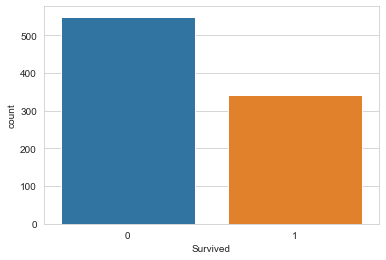

In [59]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

In my dataset we mark as 1 = Survived and 0 = not Survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

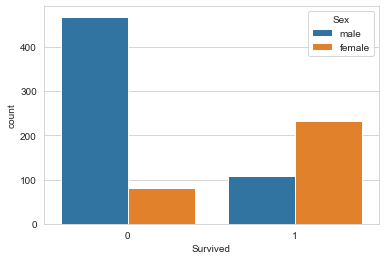

In [61]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df)

In my data set we convert two categ like sex survived or not.as thing here 1 is survived and 0 is not survived.

<AxesSubplot:xlabel='Survived', ylabel='count'>

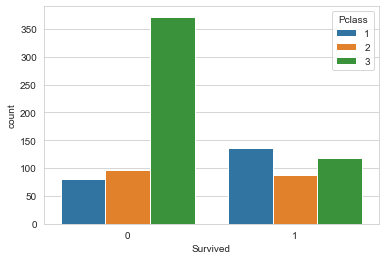

In [62]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,)

In my data set we convert Three categ like Pclass. survived or not.as thing here 1 is survived and 0 is not survived.

<AxesSubplot:xlabel='Age'>

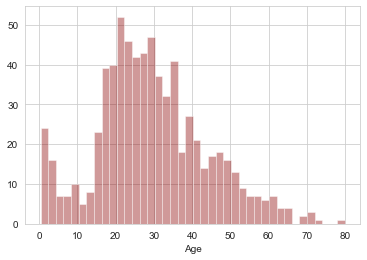

In [63]:
sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot:>

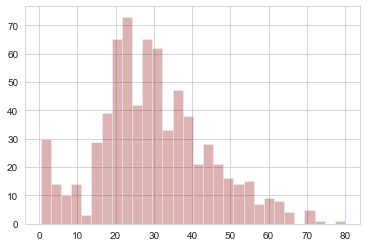

In [64]:
df['Age'].hist(bins=30,color='darkred',alpha=0.3)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

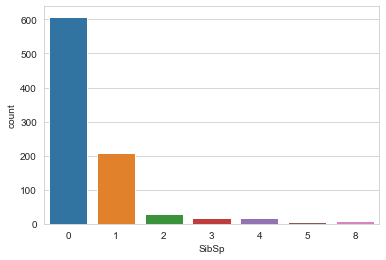

In [65]:
sns.countplot(x='SibSp',data=df)

<AxesSubplot:xlabel='Parch', ylabel='count'>

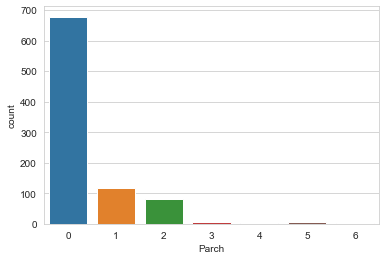

In [66]:
sns.countplot(x='Parch',data=df)

<AxesSubplot:>

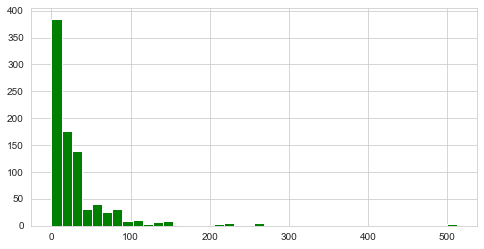

In [67]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [68]:
### Data cleaning

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

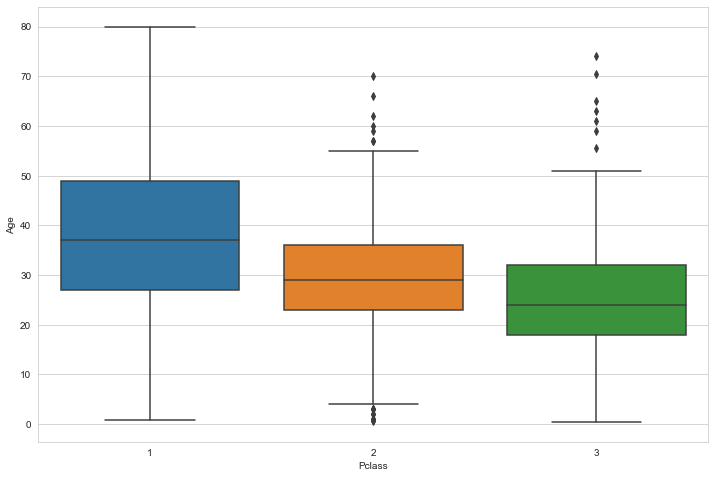

In [69]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass',y='Age',data=df)

We can see the weathier passengers in the higher classes tend to be older ,which makes sense we will use these average age values to impute based on Pclass for Age

In [70]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass ==3:
            return 29
        else:
            return 24
    else:
        return Age

        
    

Now Apply the functions

In [71]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

Now lets check heatmap again

<AxesSubplot:>

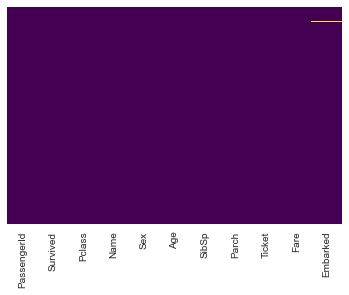

In [75]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

lets go ahead and drop the Cabin column and the row in Embarked that is NaN

In [73]:
df.drop('Cabin',axis=1,inplace=True)

In [74]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
df.dropna(inplace=True)

### Converting Categorical Features

We will need to convert categorical features to dummy cvariables using pandas.otherwise our machine algorithm will not able to 
directly take in those features as inputs

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
Now There is no any missing value in my dataset

In [77]:
pd.get_dummies(df['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [78]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embarked = pd.get_dummies(df['Embarked'],drop_first=True)

In [79]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [80]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [81]:
df = pd.concat([df,sex,embarked],axis=1)

In [82]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


our data is ready for our models

In [83]:
x= df.drop('Survived',axis=1)
y = df['Survived']

In [84]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS = i
        
print("Best accuracy is",maxAccu,"on Random_state",maxRS)

Best accuracy is 0.835820895522388 on Random_state 56


### Creating train_test split

In [85]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state = maxRS)

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
LR = LogisticRegression()
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))


0.835820895522388
[[158  20]
 [ 24  66]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       178
           1       0.77      0.73      0.75        90

    accuracy                           0.84       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.83      0.84      0.83       268



In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
predlr = dt.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.7873134328358209
[[142  36]
 [ 21  69]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       178
           1       0.66      0.77      0.71        90

    accuracy                           0.79       268
   macro avg       0.76      0.78      0.77       268
weighted avg       0.80      0.79      0.79       268



In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predlr = rf.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8059701492537313
[[150  28]
 [ 24  66]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       178
           1       0.70      0.73      0.72        90

    accuracy                           0.81       268
   macro avg       0.78      0.79      0.78       268
weighted avg       0.81      0.81      0.81       268



In [89]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
svc = SVC()
svc.fit(x_train,y_train)
predlr = svc.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.6791044776119403
[[168  10]
 [ 76  14]]
              precision    recall  f1-score   support

           0       0.69      0.94      0.80       178
           1       0.58      0.16      0.25        90

    accuracy                           0.68       268
   macro avg       0.64      0.55      0.52       268
weighted avg       0.65      0.68      0.61       268



We are getting highest accuracy with LogisticRegression(84%)but it can due to overfitting also so we will check cross validation scores.

### Cross validation

In [91]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(LR,x,y,cv=5)

print("Cross validation score of LogisticRegression model :",scr.mean())

Cross validation score of LogisticRegression model : 0.7632289247379324


In [92]:
scr = cross_val_score(dt,x,y,cv=5)

print("Cross validation score of DecisionTree model :",scr.mean())

Cross validation score of DecisionTree model : 0.7611449375431547


In [93]:
scr = cross_val_score(rf,x,y,cv=5)

print("Cross validation score of RandomForest model :",scr.mean())

Cross validation score of RandomForest model : 0.798079216621681


In [94]:
scr = cross_val_score(svc,x,y,cv=5)

print("Cross validation score of SVC model :",scr.mean())

Cross validation score of SVC model : 0.6375117695059946


Minimum diffrence in accuracy and cross validation score is for RandomForestClassifier so this is our best model.

### Hyper parameter tuning

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
# RandomForestClassifier

parameters = {'n_estimators':[200,700],
             'max_features':['auto','sqrt','log2'],
             'max_depth': [4,5,6,7,8],
             'criterion': ['gini','entropy']}

In [97]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [98]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]})

In [99]:
GCV.best_params_ # printing the best parameter found by GridSearchCV

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 700}

In [100]:
mod = RandomForestClassifier(criterion='gini',max_features='auto',max_depth=4,n_estimators=700)

mod.fit(x_train,y_train)
pred=mod.predict(x_test)

print(accuracy_score(y_test,pred)*100)

81.34328358208955


### Saving the model

In [102]:
import joblib
joblib.dump(mod,'TitanicModel.pk1')

['TitanicModel.pk1']